
# Basic Usage of `gridinit`

Grids are defined by 

1. Projection (via EPSG code)
2. The extent in projection coordinates ([x_min, x_max, y_min, y_max] in meter) 
3. The (isotropic) spatial resolution in meter

The grids are created by computing the grid cell locations (center of grid cell) in projection coordinates with equal spacing and the computing longitude, latitude positions by inverse projection. 


In [19]:
from gridinit import Grid

grid = Grid(
    6931,
    (-5_400_000, 5_400_000, -5_400_000, 5_400_000),
    12_500
)

The grid instance contains the grid definition and the grid data. 

In [20]:
grid.get_definition()

GridDefinition(epsg=6931, extent_m=(-5400000, 5400000, -5400000, 5400000), resolution_m=12500.0)

In [21]:
grid_data = grid.get_data()

The grid data contains the grid x (`xc`)  and y (`yc`) coordinates in meter and kilometer (`xc_km`, `yc_km`)

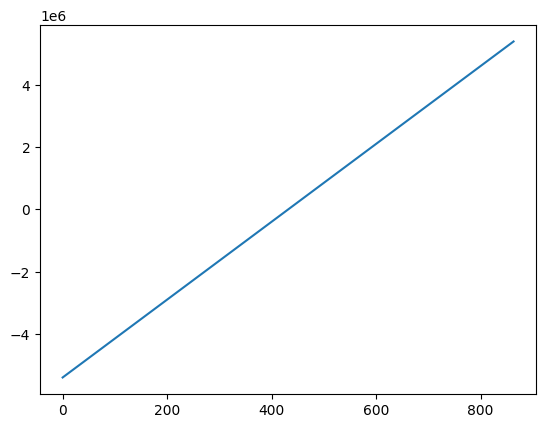

In [22]:
import matplotlib.pyplot as plt
plt.plot(grid_data.xc)

and also the longitude, latitude coordinates of all grid cells:

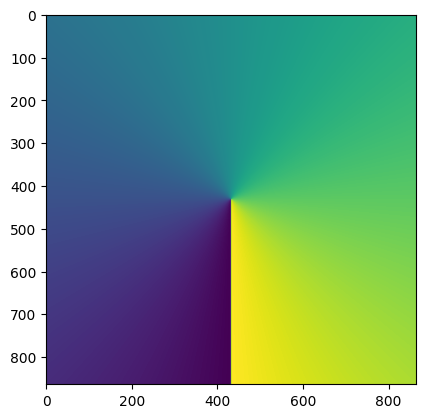

In [23]:
plt.imshow(grid_data.lon)

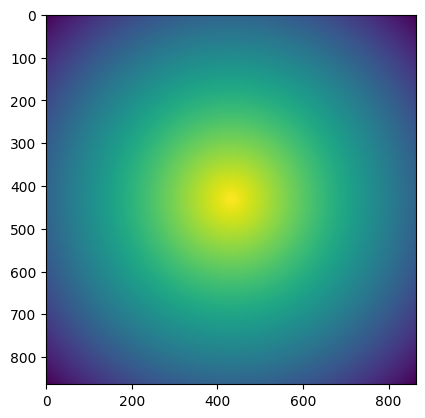

In [24]:
plt.imshow(grid_data.lat)

For the integration into the netCDF data, the grid mapping name and dictionary is also available in the property `grid_mapping`

In [25]:
grid_data.grid_mapping

('lambert_azimuthal_equal_area',
 {'semi_major_axis': 6378137.0,
  'semi_minor_axis': 6356752.314245179,
  'inverse_flattening': 298.257223563,
  'reference_ellipsoid_name': 'WGS 84',
  'longitude_of_prime_meridian': 0.0,
  'prime_meridian_name': 'Greenwich',
  'geographic_crs_name': 'WGS 84',
  'horizontal_datum_name': 'World Geodetic System 1984 ensemble',
  'projected_crs_name': 'WGS 84 / NSIDC EASE-Grid 2.0 North',
  'latitude_of_projection_origin': 90.0,
  'longitude_of_projection_origin': 0.0,
  'false_easting': 0.0,
  'false_northing': 0.0})

## Using Presets

The same as above can be achieved using pre-defined grids:

In [26]:
from gridinit import GridPresets

grid = Grid.from_preset(GridPresets.cci_ease2_nh_25km)

The following grids have presets (currently):

In [27]:
GridPresets.names()

['cci_ease2_nh_12p5km',
 'cci_ease2_nh_25km',
 'cci_ease2_sh_12p5km',
 'cci_ease2_sh_25km',
 'cci_ease2_sh_50km']